In [1]:
from __future__ import print_function
__author__= 'fbb'
import os

from scipy.optimize import curve_fit, minimize

## choose which distributions to use 

In [2]:
distributions = ['pois', 'gaus', 'chisq', 'cauchy', 'lnorm', 'binomial']

##and which mean to give it

In [3]:
mymean=100

In [4]:
#the chi sq distribution takes the number of degrees of freedom, which luckily is the same as the mean!
df = 100

In [7]:
#note: i am adding imports here, to show the workflow: 
#at this point i realize what packages i need and i import them. 
#but it is a good habit to put the includes at the top 
#so the code fails right away if the packages are missing. 
#otherwise a user may have to code running for a long time, and then fail when the package cannot be imported... 
#(unless they are only imported under conditions, e.g. in an if statement)

import numpy as np
md={}
#md is an empty disctionary
md['chisq'] = np.random.chisquare(df, size=100)
md['pois'] = np.random.poisson(mymean,size=100)
md['norm'] = np.random.normal(mymean,1,size=100)
md['binomial'] = np.random.binomial(n=200,p=0.5,size=100)
md['uniform'] = np.random.uniform(0,200,size=100)
md['exponential'] = np.random.exponential(100, size=100)
#md now is a dictionary with one object: an array by the key 'chisq'

import pylab as pl
import json
#s = json.load( open('fbb_matplotlibrc.json') )
#pl.rcParams.update(s)

%pylab inline
#pl.hist(md['chisq'],bins=30)
#pl.ylabel('N')
#pl.xlabel('x')

Populating the interactive namespace from numpy and matplotlib


##lets see what the mean and std of this distributions are

In [9]:
print ("Chisq mean: %.2f, standard deviation: %.2f"%(md['chisq'].mean(), md['chisq'].std()))

Chisq mean: 97.06, standard deviation: 11.98


## Now let's do it for 100 Chisq distributions
we want distributions of different sizes (all integers between 10 and 1000)

In [15]:
#mysize=1000/(np.array(range(1,100)))
mysize=10000/(np.array(range(1,100)+[10]))
#mysize=(np.random.rand(100)*1000).astype(int)
print (mysize, mysize.shape)

[10000  5000  3333  2500  2000  1666  1428  1250  1111  1000   909   833
   769   714   666   625   588   555   526   500   476   454   434   416
   400   384   370   357   344   333   322   312   303   294   285   277
   270   263   256   250   243   238   232   227   222   217   212   208
   204   200   196   192   188   185   181   178   175   172   169   166
   163   161   158   156   153   151   149   147   144   142   140   138
   136   135   133   131   129   128   126   125   123   121   120   119
   117   116   114   113   112   111   109   108   107   106   105   104
   103   102   101  1000] (100,)


In [16]:
#I am gonna overwrite the disctionary entry created into a nested dictionary (not PEP8...)

md['chisq']={} 
md['pois'] = {} 
md['norm'] = {} 
md['binomial'] = {} 
md['uniform'] = {} 
md['exponential'] = {} 

#and do it in a for loop. not pythonic, sigh..

for n in mysize:
    md['chisq'][n] = np.random.chisquare(df, size=n)
    md['pois'][n] = np.random.poisson(mymean,size=n)
    md['norm'][n] = np.random.normal(mymean,1,size=n)
    md['binomial'][n] = np.random.binomial(n=200,p=0.5,size=n)
    md['uniform'][n] = np.random.uniform(0,200,size=n)
    md['exponential'][n] = np.random.exponential(100, size=100)
    
means = {}
means['chisq'] = {}
means['pois'] = {}
means['norm'] = {}
means['binomial'] = {}
means['uniform'] = {}
means['exponential'] = {}
#fig_mu_N = pl.figure(figsize=(10,10))
#axchisq_mu_n = fig_mu_N.add_subplot(111)
#for nn in md['chisq'].iterkeys():
#    means['chisq'][nn] = md['chisq'][nn].mean()
#    #and plot it
#    axchisq_mu_n.plot(nn, means['chisq'][nn], 'o')
#    axchisq_mu_n.set_xlabel('sample size')
#    axchisq_mu_n.set_ylabel('sample mean')
#    axchisq_mu_n.plot([min(mysize), max(mysize)],[df,df], 'k')   

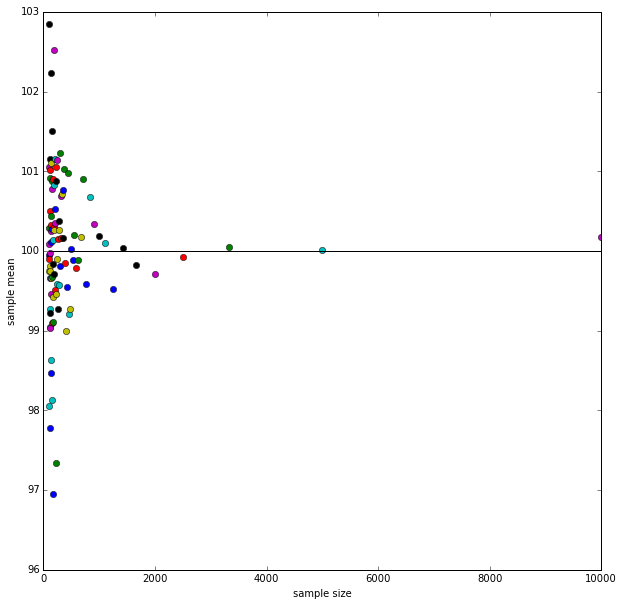

In [25]:
fig_mu_N = pl.figure(figsize=(10,10))
axchisq_mu_n = fig_mu_N.add_subplot(111)
for nn in md['chisq'].iterkeys():
    means['chisq'][nn] = md['chisq'][nn].mean()
    axchisq_mu_n.plot(nn, means['chisq'][nn], 'o')
    axchisq_mu_n.set_xlabel('sample size')
    axchisq_mu_n.set_ylabel('sample mean')
    axchisq_mu_n.plot([min(mysize), max(mysize)],[df,df], 'k')

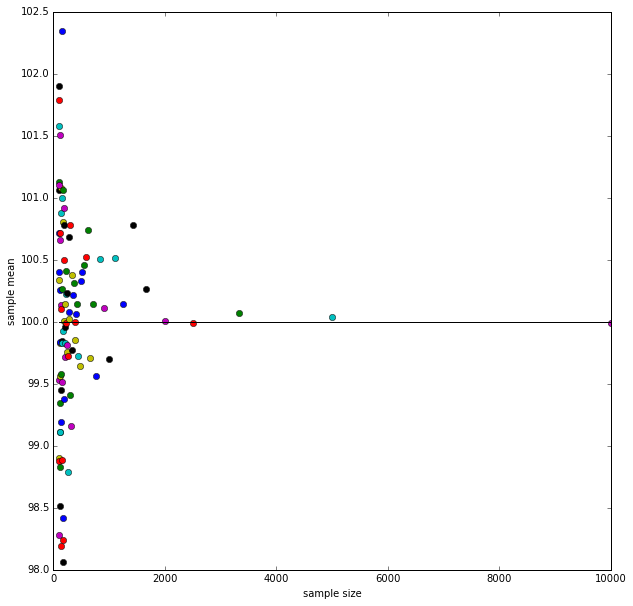

In [27]:
fig_mu_N2 = pl.figure(figsize=(10,10))
axchisq_mu_n2 = fig_mu_N2.add_subplot(111)
for nn in md['pois'].iterkeys():
    means['pois'][nn] = md['pois'][nn].mean()
    axchisq_mu_n2.plot(nn, means['pois'][nn], 'o')
    axchisq_mu_n2.set_xlabel('sample size')
    axchisq_mu_n2.set_ylabel('sample mean')
    axchisq_mu_n2.plot([min(mysize), max(mysize)],[df,df], 'k')

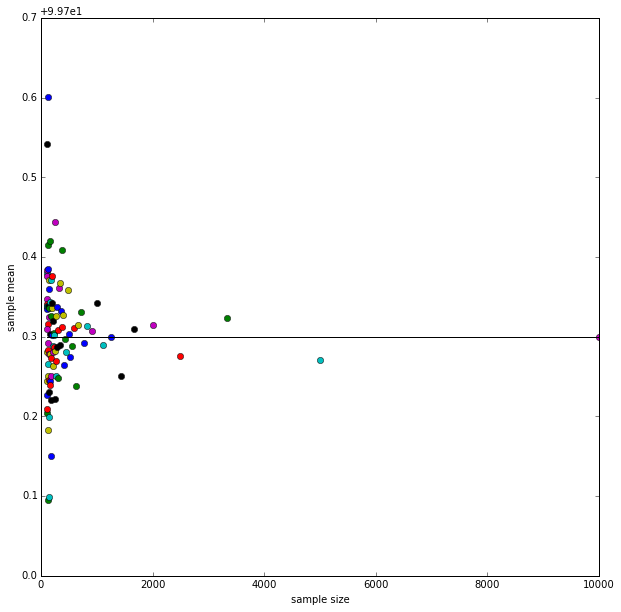

In [28]:
fig_mu_N3 = pl.figure(figsize=(10,10))
axchisq_mu_n3 = fig_mu_N3.add_subplot(111)
for nn in md['norm'].iterkeys():
    means['norm'][nn] = md['norm'][nn].mean()
    axchisq_mu_n3.plot(nn, means['norm'][nn], 'o')
    axchisq_mu_n3.set_xlabel('sample size')
    axchisq_mu_n3.set_ylabel('sample mean')
    axchisq_mu_n3.plot([min(mysize), max(mysize)],[df,df], 'k')

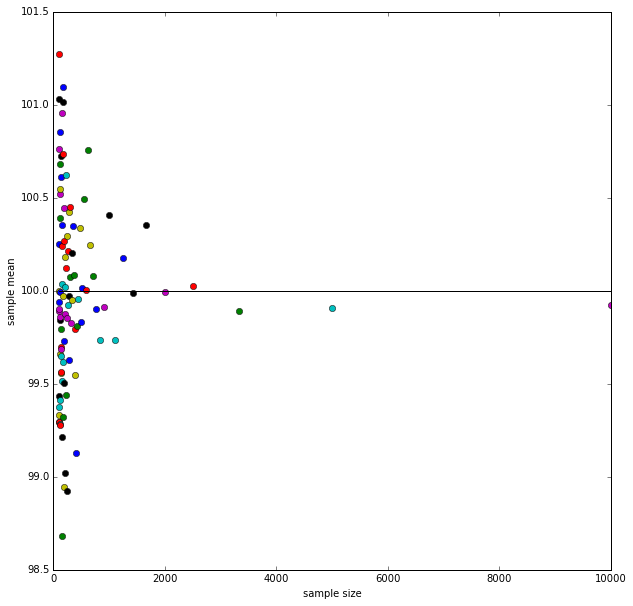

In [31]:
fig_mu_N = pl.figure(figsize=(10,10))
axchisq_mu_n = fig_mu_N.add_subplot(111)
for nn in md['binomial'].iterkeys():
    means['binomial'][nn] = md['binomial'][nn].mean()
    axchisq_mu_n.plot(nn, means['binomial'][nn], 'o')
    axchisq_mu_n.set_xlabel('sample size')
    axchisq_mu_n.set_ylabel('sample mean')
    axchisq_mu_n.plot([min(mysize), max(mysize)],[df,df], 'k')

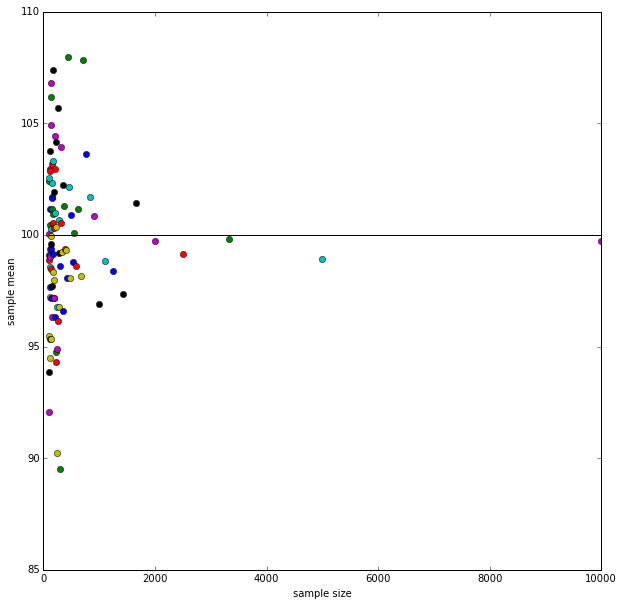

In [32]:
fig_mu_N = pl.figure(figsize=(10,10))
axchisq_mu_n = fig_mu_N.add_subplot(111)
for nn in md['uniform'].iterkeys():
    means['uniform'][nn] = md['uniform'][nn].mean()
    axchisq_mu_n.plot(nn, means['uniform'][nn], 'o')
    axchisq_mu_n.set_xlabel('sample size')
    axchisq_mu_n.set_ylabel('sample mean')
    axchisq_mu_n.plot([min(mysize), max(mysize)],[df,df], 'k')

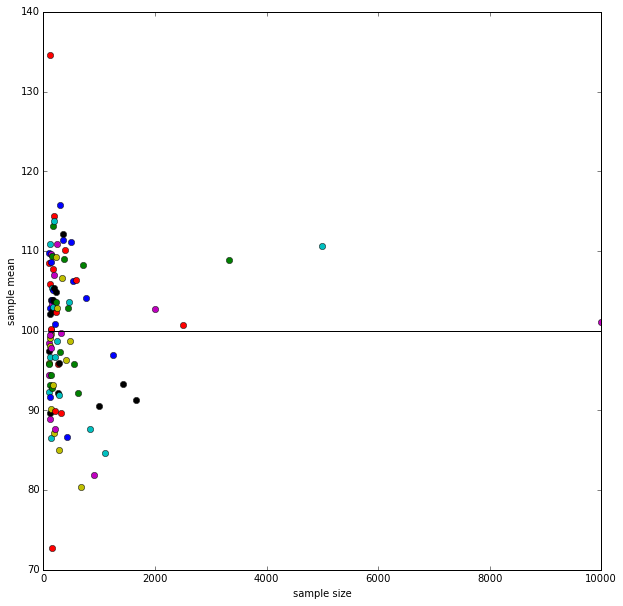

In [33]:
fig_mu_N = pl.figure(figsize=(10,10))
axchisq_mu_n = fig_mu_N.add_subplot(111)
for nn in md['exponential'].iterkeys():
    means['exponential'][nn] = md['exponential'][nn].mean()
    axchisq_mu_n.plot(nn, means['exponential'][nn], 'o')
    axchisq_mu_n.set_xlabel('sample size')
    axchisq_mu_n.set_ylabel('sample mean')
    axchisq_mu_n.plot([min(mysize), max(mysize)],[df,df], 'k')

In [34]:
#When sample sizes are larger, the sample mean is closer to the population mean.
#This is expected because standard deviation sample mean sclaes inversely to sqrt(sample size).

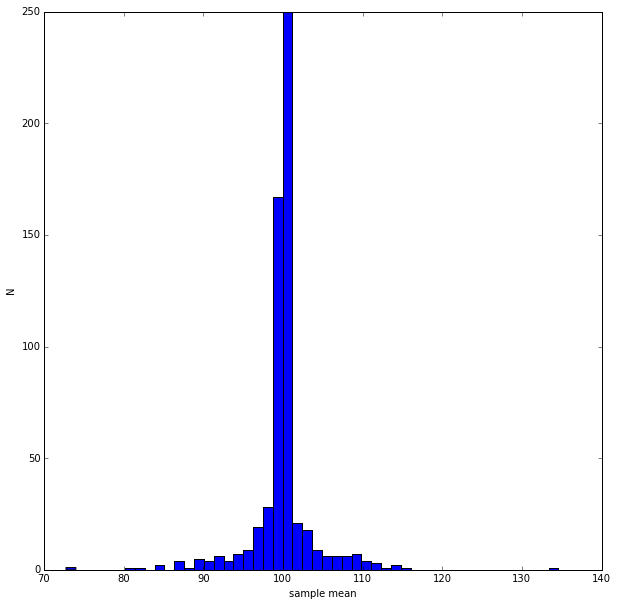

In [39]:
allmeans=[]
for n in means['chisq']:
    allmeans.append(means['chisq'][n])
for n in means['norm']:
    allmeans.append(means['norm'][n])
for n in means['binomial']:
    allmeans.append(means['binomial'][n])
for n in means['exponential']:
    allmeans.append(means['exponential'][n])
for n in means['uniform']:
    allmeans.append(means['uniform'][n])
for n in means['pois']:
    allmeans.append(means['pois'][n])
pl.figure(figsize=(10,10))
pl.hist(allmeans,bins=50)
pl.xlabel('sample mean')
pl.ylabel('N')

In [40]:
from scipy.stats import norm